## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [122]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv('students-data.csv',sep=';'  , engine='python')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [3]:
df['index']=np.arange(0,395,1)
df.set_index(df['index'],inplace=True)
df.head()

#df.isnull()
#df1=df.dropna(how='any',axis=0,inplace=True) 



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,index
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,4


In [4]:
df.isnull().any().any()

False

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [4]:
df.select_dtypes(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
index,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [5]:
np.var(df)

age               1.624163
Medu              1.195411
Fedu              1.181183
traveltime        0.485281
studytime         0.702541
failures          0.551617
famrel            0.801961
freetime          0.995199
goout             1.236251
Dalc              0.791412
Walc              1.654478
health            1.928050
absences         63.887390
G1               10.989162
G2               14.113097
G3               20.936478
index         13002.000000
dtype: float64

In [6]:
df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1,inplace=True)

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3,index
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,4,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,3,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,2,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,no,yes,yes,no,yes,yes,no,no,2,2,5,4,6,10,10,4


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["school"] = le.fit_transform(df["school"])
df["sex"] = le.fit_transform(df["sex"])
df["address"] = le.fit_transform(df["address"])
df["famsize"] = le.fit_transform(df["famsize"])
df["Pstatus"] = le.fit_transform(df["Pstatus"])
df["Mjob"] = le.fit_transform(df["Mjob"])
df["Fjob"] = le.fit_transform(df["Fjob"])
df["reason"] = le.fit_transform(df["reason"])
df["guardian"] = le.fit_transform(df["guardian"])
df["schoolsup"] = le.fit_transform(df["schoolsup"])
df["famsup"] = le.fit_transform(df["famsup"])
df["paid"] = le.fit_transform(df["paid"])
df["activities"] = le.fit_transform(df["activities"])
df["nursery"] = le.fit_transform(df["nursery"])
df["higher"] = le.fit_transform(df["higher"])
df["internet"] = le.fit_transform(df["internet"])
df["romantic"] = le.fit_transform(df["romantic"])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3,index
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,5,5,6,1
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,7,8,10,2
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,15,14,15,3
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,6,10,10,4


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [9]:
df['G1']=np.where(df[['G1']]>=10,1,0)


In [10]:
df['G2']=np.where(df[['G2']]>=10,1,0)

In [11]:
df['G3']=np.where(df[['G3']]>=10,1,0)

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3,index
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,0,0,0,0
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,0,0,0,1
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,0,0,1,2
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,1,1,1,3
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,0,1,1,4


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [13]:
df.drop('index',axis=1,inplace=True)

In [14]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,0,1,1


In [101]:
y=df['G3']
X=df.iloc[:,0:26]

In [16]:
df.shape

(395, 27)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

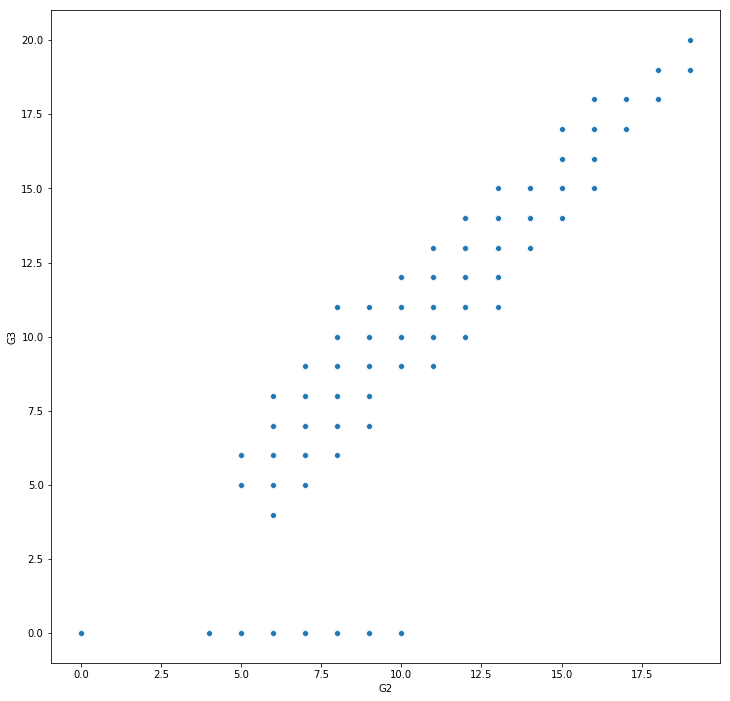

In [119]:
sns.scatterplot(df['G2'],df['G3'])




The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

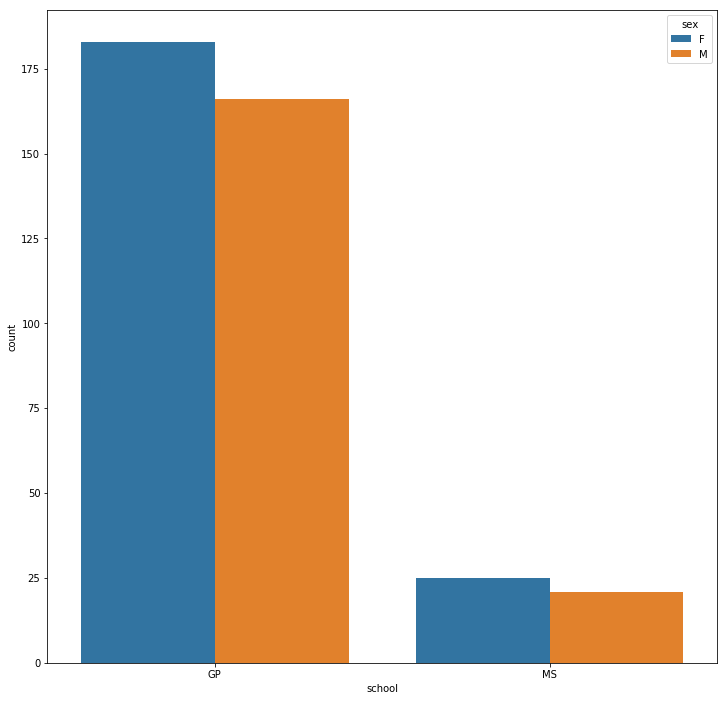

In [124]:
sns.countplot(x='school',hue='sex',data=df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(316, 26)
(316,)
(79, 26)
(79,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [107]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
model_score=model.score(X_test,y_test)
model_score_train=model.score(X_train,y_train)

/Users/nikhilkanojia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
print("Test Accuracy is:",model_score)
print("Train Accuracy is:",model_score_train)
print("F1 score is:",metrics.f1_score(y_test,y_predict))
#print("F1 score is:",metrics.f1_score(y_train,X_train))

Test Accuracy is: 0.9113924050632911
Train Accuracy is: 0.9208860759493671
F1 score is: 0.9306930693069307


In [34]:
model_scores=model.score(X_train,Y_train)
model_scores

0.9145569620253164

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.98      0.92      0.95        51

   micro avg       0.94      0.94      0.94        79
   macro avg       0.93      0.94      0.93        79
weighted avg       0.94      0.94      0.94        79



# Naive bayes with Iris data

### Import Iris.csv

In [36]:
df1=pd.read_csv("iris.csv")

In [38]:
df1.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [46]:
y=df1['Class']
X=df1.iloc[:,0:4]


### Find the distribution of target variable (Class)

In [59]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df1["Class"] = le1.fit_transform(df1["Class"])

In [125]:
df1.groupby(['Class']).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### Plot the distribution of target variable using histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

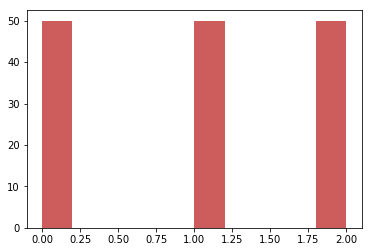

In [62]:
import matplotlib.pyplot as plt
plt.hist(df1['Class'],color='indianred')
#sns.distplot(df1['Class'])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

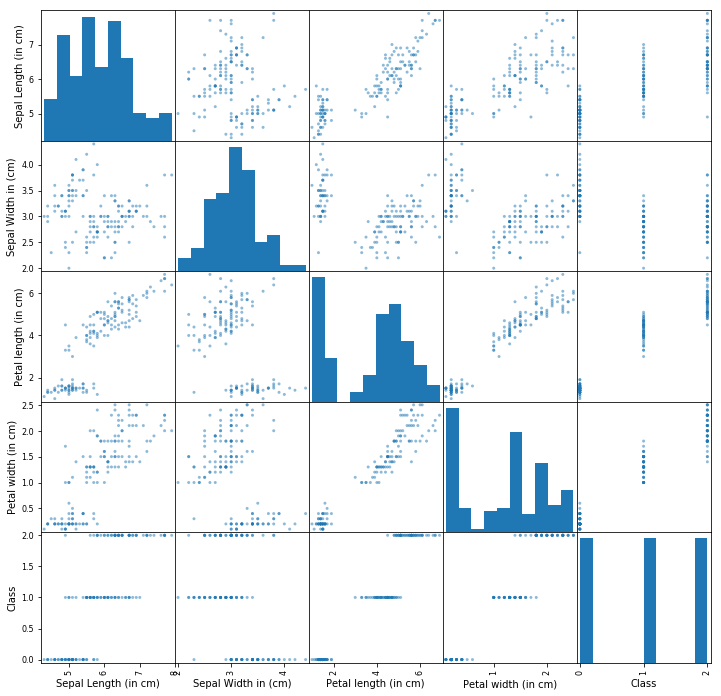

In [84]:
#plt.figure(figsize=(100,100))
from pandas.plotting import scatter_matrix
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
scatter_matrix(df1)

plt.show()

### Summary Statistics and explain insights for at least 2 variables

In [85]:
df1.describe()
#the distribution of data wrt SepalLength and SepalWidth is almost normal, as the mean 
#is almost equal to the median

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Correlation among all variables and give your insights

In [89]:
df1.corr()
#There is a strong corr between petal width and petal length


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and Validation in 80:20

In [90]:
y1=df1['Class']
X1=df1.iloc[:,0:4]


from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2)

### Do Feature Scaling

In [94]:
from sklearn import preprocessing  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
X1_after_min_max_scaler = min_max_scaler.fit_transform(X1) 
  
print ("\nAfter min max Scaling : \n", X1_after_min_max_scaler) 


After min max Scaling : 
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.1186440

### Train and Fit NaiveBayes Model

In [96]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X1_train, y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [98]:
# make predictions
expected = y1_test
predicted = model.predict(X1_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        12
           2       1.00      0.83      0.91         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[12  0  0]
 [ 0 12  0]
 [ 0  1  5]]
